# TP - NSI - Sténographie

<hr>
Écrire votre nom ici 

Nom : 
<hr>

# Commençons par faire afficher une image
Nous travaillerons avec cette célèbre image
<p style="text-align:left";>
<img src="http://isn-icn-ljm.pagesperso-orange.fr/photo/joconde.png" width="204px" height="160px">
</p>
Pour utiliser/manipuler des images en Python, il faut utiliser une bibliothèque.

Nous utiliserons la bibliothèque: **pillow**

Si elle n'est pas déjà installée : 

In [35]:
#!pip install pillow

**Pour ceux qui utilise la version(jupyter) de EduPython:**

Exécutez cette cellule au préalable afin d'importer le module display pour l'affichage des images dans le notebook

In [1]:
from IPython.display import display

<hr>

**Le code suivant affiche l'image**

L'image est hébergée sur un serveur et est chargée dans ce notebook


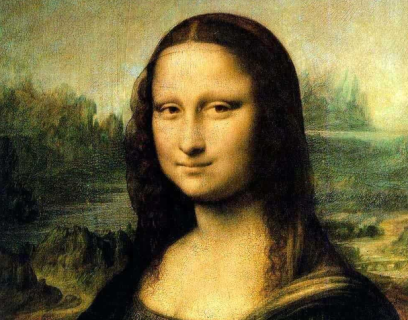

In [34]:
#chargement des bibliothèques 
from PIL import Image
import requests
from io import BytesIO
# chargement de la photo se trouvant à l'adresse donnée
url=" http://isn-icn-ljm.pagesperso-orange.fr/photo/joconde.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
#affichage de l'image
display(img)

**Dans tout ce TP la variable img contient l'image téléchargée depuis le serveur**

## Composition d'une image

* Une image peut être assimilée à un tableau de pixels
* Chaque pixel est constitué d'une couleur
* Une couleur est un mélange de trois couleurs ( rouge, vert , bleu, alpha ) alpha gère l'opacité de l'image
     * (0,0,0) pour le noir
     * (255,255,255) pour le blanc
     * ( 255,0,0) pour du rouge
     * etc ..

***Une image est donc constituée de pixels qui contiennent une couleur***
<hr>

    
**Le code suivant  charge les pixels dans une liste de tuples**


In [3]:
# on récupère les dimensions dans les variables largeur et hauteur
largeur,hauteur=img.size
#affichage du résultat
print(largeur," X ",hauteur," pixels soit :",largeur*hauteur, " pixels")
listePixels = list(img.getdata())# on met en liste le contenu de "data"
print(listePixels[0])

408  X  320  pixels soit : 130560  pixels
(116, 118, 79, 255)


<hr>

**Voici le code pour récupérer la liste des 9 premiers pixels**

In [12]:
for i in range(9):
    print(listePixels[i],end='-')

(116, 118, 79, 255)-(117, 119, 81, 255)-(90, 92, 54, 255)-(93, 95, 57, 255)-(91, 93, 55, 255)-(104, 106, 66, 255)-(111, 111, 70, 255)-(102, 103, 62, 255)-(92, 93, 52, 255)-

<hr>

## Récupérer les composantes ( rouge, vert , bleu , alpha) d'un pixel

Comme on le constate avec le programme ci-dessus, listePixels est une liste de tuples et chacun contient 4 valeurs : **( rouge, vert , bleu , alpha)**

**Pour atteindre un élément de pixel :**

* rouge=listePixels[0][0]
* vert=listePixels[0][1]
* bleu=listePixels[0][2]
* alpha=listePixels[0][3]

**On peut récupérer ces valeurs dans des variables avec le code suivant :**


In [22]:
i=5
rouge=listePixels[i][0]
vert=listePixels[i][1]
bleu=listePixels[i][2]
alpha=listePixels[i][3]
#affichage du résultat
print("La composante rouge  du ",i,"ème pixel est:",rouge)
print("La composante verte  du ",i,"ème pixel est:",vert)
print("La composante bleue  du ",i,"ème pixel est:",bleu)
print("La composante alpha  du ",i,"ème pixel est:",alpha)


La composante rouge  du  5 ème pixel est: 104
La composante verte  du  5 ème pixel est: 106
La composante bleue  du  5 ème pixel est: 66
La composante alpha  du  5 ème pixel est: 255
66


<hr>

## Modifications


**Le code ci-dessous, modifie la composante bleue des 100 premiers pixels à partir du second ( du pixel d'indice 1 au pixel d'indice 100).**

Les valeurs de la composante bleue de ces pixels changent de parité, avec un cas particulier, si cette valeur est 255    
On crée une image vierge avec les pixels modifiés de notre image.
    


la composante bleue du 5ème pixel est:  65
la composante bleue du 5ème pixel est maintenant :  255


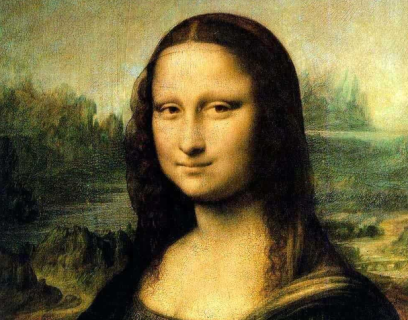

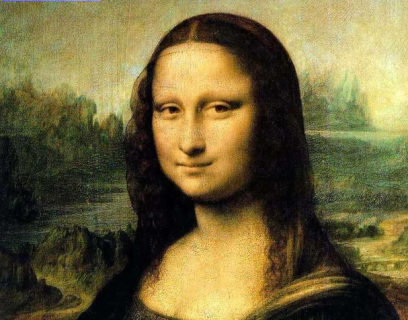

In [23]:
listePixels = list(img.getdata())
bleu1=listePixels[5][2]
print("la composante bleue du 5ème pixel est: ",bleu1)

#création d'une image vide de mêmes dimensions
img2=Image.new(img.mode,img.size)

# On parcourt la liste avec une boucle:
for i in range(1,101,1):
    b=listePixels[i][2]
    if b%2!=0:
        if b==255:
            b=b-1
        else:
            b=b+1
    else:
        b=b+1
  # on est obligé de changer tout le tuple, car ils sont non mutables
    listePixels[i]=(listePixels[i][0],listePixels[i][1],a,listePixels[i][3])
bleu2=listePixels[5][2]
print("la composante bleue du 5ème pixel est maintenant : ",bleu2)
img2.putdata(listePixels)

#affichage des deux images
display(img,img2) 

L'image ne semble pas modifiée à l'oeuil...

# Les chaînes de caractères

Chaque lettre possède un code ascii qui permet de la représenter en binaire :

Par exemple:
* Le code ascii de la lettre A est : 65 

* Qui se représente en binaire sur 8 bits par : 01000001



In [16]:
# code ascii de A
print(ord("A"))

# représentation en binaire de A
binaire = bin(ord("A"))[2:]
print(binaire)

# mise sous forme d'une chaîne de caractères
binairec = str(binaire)

# mise en 8 bits ( en rajoutant des 0 à gauche)
while len(binairec)<8:
    binairec = "0" + binairec
print(binairec)

# récupération de la valeur en décimal du nombre en binaire
n=0
for i in range(8):
  n = n + int(binairec[i])*2**(7-i)
print(n)

# récupération de la lettre à partir du code ascii
print(chr(n))


65
1000001
01000001
65
A


<hr>

**Voici une fonction qui transforme un mot en liste de ses lettres représentées en binaire**

In [30]:
def motTobinaire(mot):
    liste=[]
    for el in mot:
        binaire=str(bin(ord(el))[2:])
        while len(binaire) < 8:
            binaire = "0" + binaire
        liste.append(binaire)
    return liste

tmp=motTobinaire("Hello")
print(tmp)

['01001000', '01100101', '01101100', '01101100', '01101111']


<hr>

**On transforme cette liste en une simple liste pour éventuellement la traiter**

In [31]:
tmp_liste=[]
for el in tmp:
    tmp_liste=tmp_liste+list(el)
print(tmp_liste)

['0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1']


<hr>

**On regroupe les éléments par 8 pour récupérer les lettres...**

In [32]:
tmp_liste_8bit=[]
for i in range(0,len(tmp_liste),8):# par paquets de 8
    tmp_b=""
    for j in range(8):# et pour les 8 concernés
        tmp_b=tmp_b+tmp_liste[i+j]
    tmp_liste_8bit.append(tmp_b)
print(tmp_liste_8bit)

['01001000', '01100101', '01101100', '01101100', '01101111']


<hr>

**Et celle-ci renvoie le mot à partir de cette liste**

In [33]:
def binaireTomot(liste):
    mot=""
    for el in liste:
        n=0
        for i in range(8):
            n = n + int(el[i])*2**(7-i)
        mot=mot+chr(n)
    return mot

tmp2=binaireTomot(tmp_liste_8bit)
print(tmp2)


Hello


<hr> 

# Comment cacher un texte dans une image

**La stéganographie** est l'art de la dissimulation : son objet est de faire passer inaperçu un message dans un autre message. Elle se distingue de la cryptographie, « art du secret », qui cherche à rendre un message
inintelligible à autre que qui-de-droit. Pour prendre une métaphore, la stéganographie consisterait à enterrer son argent dans son jardin là où la cryptographie consisterait à l'enfermer dans un coffre-fort —
cela dit, rien n'empêche de combiner les deux techniques, de même que l'on peut enterrer un coffre dans son jardin.

## Le principe:
On peut cacher un texte dans une image numérique et cela de manière parfaitement invisible à l'oeil nu.
Cette technique s'appelle le tatouage. Elle est utilisée notamment pour protéger des images par copyright, mais on peut aussi transmettre des messages cachés.


Nous proposons ici une méthode simple, mais qui fonctionne seulement avec certains formats d'images(BMP et PNG). En effet, beaucoup de formats(comme JPEG) compressent les données et donc modifient les bits de l'image, ce qui a pour effet de détruire le message caché.

Nous utiliserons des images en PNG.

* Une image est une suite de pixels qui sont eux même représentés par 4 nombres (r , v , b , a).

* Chaque lettre d'un texte se représente sur 8 bits par une série de 0 et de 1 ( la lettre A est représentée par 01000001).

* On commence par remplacer la valeur de la composante bleue (on pourrait le faire avec une autre composante) du $1^{\text{er}}$ pixel de l'image par la longueur du texte à cacher ( ce qui limite notre message à 255 caractères...).

* Pour représenter la première lettre on modifie si nécessaire la parité des composantes bleues des 8 pixels suivants, en considérant qu'un nombre pair représente un 0 et qu'un nombre impair représente un 1. ( On fera un cas à part pour une valeur de 255 qui, si elle doit être modifiée, doit l'être en 254)

* Et ainsi de suite pour toutes les lettres du message...

***Par exemple, pour la première lettre du message :*** 'Hello'

Voici la liste des 9 premiers pixels de notre image:

(116, 118, 79, 255)-(117, 119, 80, 255)-(90, 92, 53, 255)-(93, 95, 56, 255)-(91, 93, 54, 255)-(104, 106, 65, 255)-(111, 111, 69, 255)-(102, 103, 61, 255)-(92, 93, 51, 255)

**Modifications à apporter sur les composantes bleues :**

| composantes bleues           | 79 | 80 | 53 | 56 | 54 | 65 | 69 | 61 | 51 |
|------------------------------|----|----|----|----|----|----|----|----|----|
| longueur de texte : 5        | 5  | 80 | 53 | 56 | 54 | 65 | 69 | 61 | 51 |
| lettre H:                    |    | 0  | 1  | 0  | 0  | 1  | 0  | 0  | 0  |
| nouvelles Composantes bleues | 5  | 80 | 53 | 56 | 54 | 65 | 70 | 62 | 52 |

Pour le mot 'Hello', il y a 5 lettres donc on devra modifier 41 pixels ($1+5\times8$ )


<hr>

# À faire:

**Sauriez-vous écrire un programme qui affiche le message caché dans cette image**
<p style="text-align:left";>
<img src="http://isn-icn-ljm.pagesperso-orange.fr/photo/gandalf.png">
</p>


In [ ]:
from PIL import Image
import requests
from io import BytesIO
# chargement de l'image' se trouvant à l'adresse donnée
url=" http://isn-icn-ljm.pagesperso-orange.fr/photo/gandalf.png"
response = requests.get(url)
img_a_decoder = Image.open(BytesIO(response.content))



# Écrire le programme ici

<hr> 

# À faire: Pour les motivés...

**Écrire un programme qui cache un message dans l'image de la joconde**


In [ ]:
from PIL import Image
import requests
from io import BytesIO
# chargement de la photo se trouvant à l'adresse donnée
url=" http://isn-icn-ljm.pagesperso-orange.fr/photo/joconde.png"
response = requests.get(url)
img_joconde = Image.open(BytesIO(response.content))


# Écrire le programme ici




#pour sauvegarder l'image modifiée
#nom_de_limage.save("img_joconde_2.png")